In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/MATH 527 Drive/

import MarketModel as MM


Mounted at /content/drive
/content/drive/Shareddrives/MATH 527 Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import MarketModel as MM
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense

from random import randrange
import logging
from keras import backend as K



In [ ]:

#import ReplayDQN as dq
#from dqutils import plot_learning_curve, make_env


In [ ]:
time = 100
dimen = 2
m = MM.MarketModel(T=time,eta=0,M=np.array([[0.01,0.01],[0.1,0.1]]),c=np.array([0,0]), mu=np.array([0.1,0.0]),d=dimen)
gary = MM.agent(MM.flatPortfolio, dimen)
po = pd.DataFrame(columns=['s','a','r','sprime'])


In [ ]:

i=0
while i<time:
  i = i+1
  m.step(gary.makeWeights(m.getState()['s_hist'][:,-1],0.5))

  po = po.append(m.makeTuple(),ignore_index=True)


#po.drop(['0'], inplace=True)
#po = pd.DataFrame(columns=po.columns)
#po.iloc[0:0]

print(po['r'][0])

0.11619755181597949


[0.0602356523856645, 0.08757613725348486]


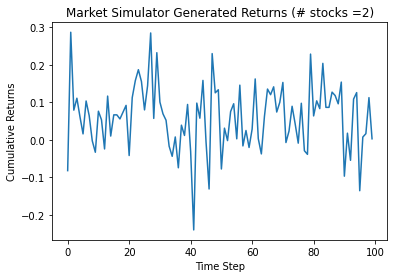

In [ ]:
po['r'].plot()
plt.xlabel('Time Step')
plt.ylabel('Cumulative Returns')
plt.title('Market Simulator Generated Returns (# stocks =2)')

print([np.mean(po['r']),np.std(po['r'])])



In [ ]:
state = m.getState()
dataFrame = pd.DataFrame(columns=['return1','return2','s1','s2'])
for i in range(0,100,1):
  dataFrame = dataFrame.append({'return1':(state['s_hist'][0,i+1]-state['s_hist'][0,i])/state['s_hist'][0,i],'return2':(state['s_hist'][1,i+1]-state['s_hist'][1,i])/state['s_hist'][1,i],'s1':state['s_hist'][0,i+1],'s2':state['s_hist'][1,i+1]},ignore_index=True)

ax1 = dataFrame.plot(y='return1',kind='line',figsize=(8,4))
ax2 = dataFrame.plot(y='return2',kind='line',ax=ax1)
plt.xlabel('Time Step')
plt.ylabel('One Step Return')
plt.title('Market Simulator Generated Returns (# stocks =2)')
plt.show()

ax3 = dataFrame.plot(y='s1',kind='line',figsize=(8,4))
ax4 = dataFrame.plot(y='s2',kind='line',ax=ax3)
plt.xlabel('Time Step')
plt.ylabel('Log Stock Price')
plt.title('Market Simulator Generated Prices (# stocks =2)')
plt.yscale("log")
plt.show()

print([np.mean(dataFrame['return1']),np.std(dataFrame['return1'])])
print([np.mean(dataFrame['return2']),np.std(dataFrame['return2'])])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Return')

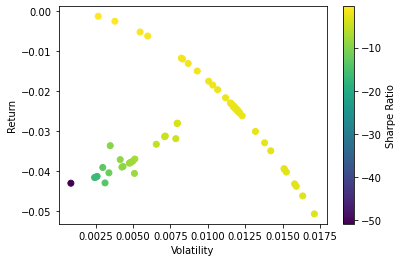

In [ ]:
mean_var_tab = []
port_E_variance = np.zeros(100)
port_E_return = np.zeros(100)
sharpe_ratios = np.zeros(100)
for i in range(len(returns_tab)):
  port_E_return[i] = actions_arr[:,0][i]*returns_tab[:,0][i] + actions_arr[:,1][i]*returns_tab[:,1][i]
  for j in range(len(returns_tab)):
    port_E_variance[i] = actions_arr[:,0][i]*actions_arr[:,1][j]*ret_cov[i,j]

mean_var_tab = [port_E_variance, port_E_return]
for i in range(len(port_E_return)):
  sharpe_ratios[i] = (port_E_return[i]/port_E_variance[i]**0.5)

sharpe_ratios[np.isnan(sharpe_ratios)] = 0


plt.scatter(mean_var_tab[0]**0.5, mean_var_tab[1],c = sharpe_ratios, cmap='viridis')
plt.xlabel('Volatility')
plt.colorbar(label = 'Sharpe Ratio')
plt.ylabel('Return')



In [ ]:
print(sharpe_ratios)


[ -2.09695763  -3.51080956   0.           0.          -2.82642687
  -2.38564339   0.           0.          -2.04084505  -2.0728211
   0.           0.          -1.93417811   0.          -2.02855507
   0.           0.           0.           0.          -2.75164442
  -2.08264303   0.          -7.51215199  -9.66770608  -7.73298706
   0.          -9.15522159  -3.5338862   -2.61575363  -4.36057697
   0.           0.          -1.99100026  -2.05536056  -2.04585484
  -2.03082575  -1.60706654  -2.28018906  -2.02702486   0.
  -2.07056429  -0.65502437   0.           0.          -8.95389687
  -1.50268612  -1.78638066  -4.41072926 -17.08506737 -11.92490236
  -2.12681328  -1.84217689  -2.04032516  -2.96102668   0.
  -1.42344857  -8.95702426  -1.43719946  -2.45724889  -2.05904555
  -2.60956622  -7.21646272  -2.03518272  -2.02778826  -2.63751775
  -7.95771594 -13.72154968 -13.11288244   0.           0.
  -7.98933537  -1.73926114  -2.01604768   0.          -1.99922589
  -2.04712339   0.          -0.9466

In [ ]:
some = po.to_numpy()
#print(some[:,0])

some1 = some[:,0]
unzip = zip(*some1)
unzip_list = list(unzip)
some2 = some[:,1]
act_unzip = zip(*some2)
actions_arr = list(act_unzip)
actions_arr = np.matrix(actions_arr)
actions_arr = np.transpose(actions_arr)
actions_arr[:,0] = actions_arr[:,0]/sum(actions_arr[:,0])
actions_arr[:,1] = actions_arr[:,1]/sum(actions_arr[:,1])

some3 = dataFrame.to_numpy()
returns_s1 = np.log(some3[:,0])
returns_s2 = np.log(some3[:,1])
returns_s2[np.isnan(returns_s2)] = 0

returns_tab = np.matrix([returns_s1, returns_s2])
returns_tab = np.transpose(returns_tab)
ret_cov = np.cov(returns_tab,bias=True)
#ret_cov = np.squeeze(ret_cov)
print(unzip_list[0])
print(unzip_list[1])

plot1 = plt.figure(1)
plt.plot(unzip_list[0])
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Stock Price Stock 1 for State S")

plot2 = plt.figure(2)
plt.plot(unzip_list[1])
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Stock Price Stock 2 for State S")

plt.show()

print([np.mean(unzip_list[0]), np.mean(unzip_list[1])])
print([np.std(unzip_list[0]), np.std(unzip_list[1])])

In [ ]:
print(actions_arr[:,0])

In [ ]:
some2 = some[:,3]
unzip2 = zip(*some2)
unzip_list2 = list(unzip2)


plot3 = plt.figure(1)
plt.plot(unzip_list2[0], label = "Stock 1 at S'")
plt.plot(unzip_list[0], label = "Stock 1 at S")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Stock Price Stock 1 at S and S''")
plt.legend()

plot4 = plt.figure(2)
plt.plot(unzip_list2[1],label="Stock 2 at S'")
plt.plot(unzip_list[1], label = "Stock 2 at S")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Stock Price Stock 2 at State S and S'")
plt.legend()
plt.show()


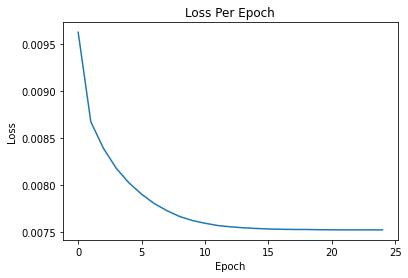

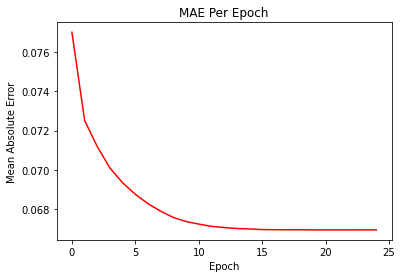

In [ ]:
Q.history.history

#loss plot
plt.plot(Q.history.history['loss'])
plt.title('Loss Per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# MAE plot
plt.plot(Q.history.history['mae'], color = 'red')
plt.title('MAE Per Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
s1_price_s = unzip_list[0]
s2_price_s = unzip_list[1]
s1_price_sprime = unzip_list2[0]
s2_price_sprime = unzip_list2[1]

returns_cov = np.cov(po['r'])
market_impact = np.zeros(len(po['s']))
daily_returns_s1 = np.zeros(len(unzip_list[0])-1)
daily_returns_s2 = np.zeros(len(unzip_list2[0])-1)

for i in range(1,len(unzip_list)):
  daily_returns_s1[i] = (s1_price_s[i] - s1_price_s[i-1])/100
  daily_returns_s2[i] = (s2_price_s[i] - s2_price_s[i-1])/100




In [ ]:
tes = np.array([[100, 100, 0.5, 0.5]])
vary_st = pd.DataFrame(columns=['s1','s2','a1','a2'])
max_val, min_val = 1, 0
range_size = (max_val - min_val)  # 2
tes[0,2] = np.random.rand(1) * range_size + min_val
tes[0,3] = 1.0 - tes[0,2]
vary_st.loc[0] = tes[0,0], tes[0,1], tes[0,2], tes[0,3]
print(vary_st)

rando = np.array([[100, 100, 0.946515, 0.053485]])
print("Q value is:", Q(rando))

      s1     s2        a1        a2
0  100.0  100.0  0.811981  0.188019
Q value is: tf.Tensor([[0.9801762]], shape=(1, 1), dtype=float32)


In [ ]:
print((s1_price_s[3] - s1_price_s[2])/100)

0.16383180603319544


#######################################################################################################

In [ ]:
#Run the bellow functions first!

#Specify the following parameters:

# trainig_time - at what episode do you want to train the replay network and copy the weights to the target network.
# copy_weights_time - at which episode to copy the weights to the Q' network.
# exploration_cutoff_time - at which episode to start lowering the exploration probability.
# episode_num - number of episodes the agent will repeat
# episode_length - how many time steps each episode has
# epoch_num - how many epochs are we using during trainig
# batch_size - size of the batch for training
# stock_num - number of stocks that we are working with. Used for figuring out the dimension of the trainig data.


def gameLoop(training_time, copy_weights_time, exploration_cutoff_time, episodes_num, episode_length, epoch_num, batch_size, stock_num):

  if training_time >= copy_weights_time:
    logging.warning("Trainig_time is bigger than the copy_weights_time! Adjust parameters!")
    return

  #Initialize networks
  Q = NN()
  Q_ = NN()


  # Initialize the Market Model, Buffer and our Agent (Gary)
  dimen = 2
  m = MM.MarketModel(T=episode_length,eta=0,M=np.array([[0.01,0.01],[0.1,0.1]]),c=np.array([0,0]), mu=np.array([0.1,0.0]),d=dimen)
  gary = MM.agent(MM.flatPortfolio, dimen)
  po = pd.DataFrame(columns=['s','a','r','sprime'])

  #Reward over episodes (for plotting)
  reward_list = []
  reward_list.append(-1000)
  #Episode list
  episode_list = []
  episode_list.append(0)

  #Culmulative reward
  culm_reward = -1000

  #Exploration parameter
  exp_param = 1

  for ep in range(1,episodes_num): #episodes
    print("Current episode is " , ep)

    #After a certain episode start lowering the exploration probability.
    if ep > exploration_cutoff_time:
      exp_param = 1 - (ep)/(episodes_num + exploration_cutoff_time )
    print("Exploration probability is ", exp_param)

    #Populate the episode list
    episode_list.append(ep)

    #Reset MM for the next epsiode
    m.reset()


    # train Q every (training_time) episodes
    if  ep % training_time == 0:

      #Turn the data from pandas to np array.
      data = prepData(po, stock_num)


      #BATCHING STUFF - NOT USED AS OF NOW.
      #Get a random batch of size data_size of experience data.
      #data_size = randrange(po.shape[0] - (po.shape[0] + 20)  ,po.shape[0] -20)
      #Call the randomBufferBatch to get a random batch of experiences
      #data_ = randomBufferBatch(data, data_size)


      #Train network
      trainNetwork(trainingDataPrep(data,stock_num), generateTargets(data, stock_num, Q_), Q, epoch_num, batch_size)
      print("Q network has been trained")

      #Delete the old experiences from the buffer when we train the Q network.
      po = pd.DataFrame(columns=po.columns)

      #If statement called only once; make a copy of the replay network so the dimensions match up (easier this way)
      if ep == 1:
        Q_ = keras.models.clone_model(Q)

    #Copy weights into the Q_ network
    if ep % copy_weights_time == 0:
      Q_.set_weights(Q.get_weights())
      print("Weights have been copied to the target Network.")

    for t in range(1,episode_length): #time steps

      #let the agent collect experiances for a (training_time) episodes.
      m.step(gary.makeWeights(m.getState()['s_hist'][:,-1],exp_param))
      po = po.append(m.makeTuple(),ignore_index=True)

      if t == episode_length - 1:
        culm_reward += m.getTotalReturn()
        reward_list.append(culm_reward)


  #Plot culmulative reward over episodes
  plt.plot(episode_list, reward_list)

  #Make a final copy of weights just in casethe if statement above was not satisfied at the end of learning.
  Q_.set_weights(Q.get_weights())

  return Q_

Current episode is  1
Exploration probability is  1
Current episode is  2
Exploration probability is  1
Current episode is  3
Exploration probability is  1
Current episode is  4
Exploration probability is  1
Current episode is  5
Exploration probability is  1
Current episode is  6
Exploration probability is  1
Current episode is  7
Exploration probability is  1
Current episode is  8
Exploration probability is  1
Current episode is  9
Exploration probability is  1
Current episode is  10
Exploration probability is  1
Epoch 1/40
13/13 [==============================] - 1s 2ms/step - loss: 1203414.6250 - mae: 573.1268
Epoch 2/40
13/13 [==============================] - 0s 2ms/step - loss: 378224.7812 - mae: 322.1946
Epoch 3/40
13/13 [==============================] - 0s 2ms/step - loss: 98376.3516 - mae: 162.7029
Epoch 4/40
13/13 [==============================] - 0s 2ms/step - loss: 16799.7617 - mae: 66.8351
Epoch 5/40
13/13 [==============================] - 0s 2ms/step - loss: 1508.1981

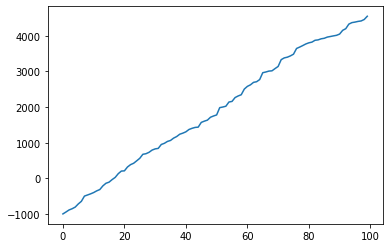

In [ ]:

# training_time = 15
# copy_weights_time = 45
# exploration_cutoff_time = 20
# episode_num = 100
# episode_length = 100
# epoch_num = 5
# batch_size = 1
# stock_num = 2

#VERY GOOD PARAMETERS: 10,20,30,100,50,40,50,2 (DO NOT ERASE)

Q = gameLoop(10,20,30,100,70,40,50,2)

In [ ]:
def simulatePath(starting_pos, s_num, num_steps):

  next_pos = starting_pos

  for i in range(1,num_steps):
    optim_action = optimalAction(next_pos,2,0.0002,Q,5)
    next_pos[0,s_num:] = optim_action

    #Get next state now and run again.

#Test Data
test1 = np.array([[150,100,0.7,0.3]])
test2 = np.array([[150,100,0.5,0.5]])
test3 = np.array([[150,100,0.1,0.9]])

optim_action1 = optimalAction(test1,2,0.0002,Q,500,1)
optim_action2 = optimalAction(test2,2,0.0002,Q,500,1)
optim_action3 = optimalAction(test3,2,0.0002,Q,500,1)

test1[0,2:] = optim_action1
test2[0,2:] = optim_action2
test3[0,2:] = optim_action3

print(Q(test1))
print(Q(test2))
print(Q(test3))

Not enough iterations has been preformed. The current updated action is  [[0.79233763 0.20766237]] . Increase the number of iterations
Not enough iterations has been preformed. The current updated action is  [[0.58073707 0.41926293]] . Increase the number of iterations
Converged! The optimal action for state  [[150. 100.]]  is  [[0.10011164 0.89988836]]
tf.Tensor([[-0.03573924]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.0358086]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.03595798]], shape=(1, 1), dtype=float32)


################################################################################################################################################################

In [ ]:
def NN():

  model = Sequential((keras.layers.Dense(4, activation='relu', use_bias=True, name='layer1'),
                      keras.layers.Dense(4, activation='relu', use_bias=True, name='layer2'),
                      keras.layers.Dense(4, activation='relu', use_bias=True, name='layer3'),
                      keras.layers.Dense(4, activation='relu', use_bias=True, name='layer4'),
                      keras.layers.Dense(4, activation='relu', use_bias=True, name='layer5'),
                      keras.layers.Dense(1, name='layer6')))
  model.compile(loss='mse', optimizer='adam', metrics=['mae'])



  return model

In [ ]:
#data - state at which the agent is positioned
#s_num - number of stocks we are working with
#tol - error tolerance
#network - neural network we are using to produce gradients
#iteration_num - number of iterations used for updating
#learning_rate - rate at which we update the actions

def optimalAction(data, s_num, tol, network, iteration_num, learning_rate):

  s = data[:,:s_num]
  a_ = data[:,s_num:]
  a_tmp = []
  i = 0
  while True:

    #print("Iteration ", i)

    data[:,s_num:] = a_ #replace the old action with the new one.
    input = tf.convert_to_tensor(data, dtype=None, dtype_hint=None, name=None)
    #Computing the gradients
    with tf.GradientTape() as g:
      g.watch(input) #Create a computational graph for the input data.
      out = network(input) #Get predictions of the NN
      loss = abs(out - 0)
    grad = g.gradient(out, input)
    grad_a = grad[:, s_num:] # Isolate gradians w.r.t actions
    #print("GRADIENT IS ", grad)


    a_tmp = a_ + learning_rate*grad_a
    a_tmp = MM.forceSimplex(np.array(a_tmp))

    #print("Old action was ", a_)
    #print("New action is ", a_tmp)
    if i >= iteration_num:
      print("Not enough iterations has been preformed. The current updated action is ", a_tmp, ". Increase the number of iterations")
      return a_tmp
      break
    if tf.norm(a_tmp - a_) < tol:
      a_ = a_tmp
      print("Converged! The optimal action for state ", s, " is ", a_)
      return a_
      break
    else:
      a_ = a_tmp
      i = i+1




In [ ]:
def generateTargets(data, s_num, network):

  #Initialize data holder with the first a1 action.
  c = data[:,s_num].reshape(data[:,s_num].shape[0],1)

  for i in range(1, s_num):
    #print(i+s_num)
    arr = data[:,i+s_num].reshape(data[:,i+s_num].shape[0],1)
    c = np.concatenate((c,arr),axis=1)
  for j in range(1, s_num+1):
    #print(j+2*s_num)
    arr = data[:,j+2*s_num].reshape(data[:,j+2*s_num].shape[0],1)
    c = np.concatenate((c,arr),axis=1)

  r = data[:,2*s_num].reshape(data[:,2*s_num].shape[0],1)

  #print(c.shape)
  return r + network(c)

In [ ]:
def randomBufferBatch(data, batch_size): #select random batch from the buffer to train the NNs with.
  if batch_size >= data.shape[0]:
    logging.warning("Size of the batch excides the size of whole data set!")
    return
  a = randrange(batch_size)

  while a + batch_size >= data.shape[0]:
    #print("range too big, try again")
    a = randrange(batch_size)
  #print("Initial start point is ", a, " and the end point is ", a+batch_size)
  print("Size of the buffer data is ", data[a:a+batch_size, :].shape)
  return data[a:a+batch_size, :]

In [ ]:
def trainNetwork(input, targets, Q, epoch, batch):

  history = Q.fit(input,targets,epochs=epoch,batch_size=batch)
  return Q.layers[0].get_weights()[0], Q.layers[0].get_weights()[1]

In [ ]:
def prepData(data, s_num):

  # s_num tells us how many s, a, sprime we have. +1 is for the reward.
  data_ = np.zeros((data.shape[0], 3 * s_num + 1))

  for row in range(data.shape[0]):
    data_[row,:] = dataCollect(data.values[row])

  return data_

In [ ]:
def trainingDataPrep(data, s_num):

  arr = data[:,0].reshape(data[:,0].shape[0],1)
  for i in range(1,2*s_num):
    a = data[:,i].reshape(data[:,i].shape[0],1)
    arr = np.concatenate((arr,a), axis=1)

  return arr

In [ ]:
def dataCollect(row):

  result = []
  for t in row:
    if type(t) == float:
      result.append(t)
      continue
    for x in t:
        result.append(x)

  return result

################################# TESTING ###################################################

In [ ]:
n = NN()

#Test data
s1 = np.array([[50,50,0.5,0.5]])
s2 = np.array([[70,50,0.2,0.8]])
s_tens = tf.keras.layers.Concatenate(axis=0)([s1, s2]) #Combined test data
print("Test data is " , s_tens)
print("#######################################################################################")
s1_tens = tf.convert_to_tensor(s1, dtype=None, dtype_hint=None, name=None)
s2_tens = tf.convert_to_tensor(s2, dtype=None, dtype_hint=None, name=None)

#Output of the test data
out = n(s1_tens)

#Targets = 0
y = np.zeros((2,1))
y_ = tf.convert_to_tensor(y, dtype=None, dtype_hint=None, name=None)

#Computing the gradients
with tf.GradientTape() as g:
  g.watch(s_tens) #Create a computational graph for the input data.
  out = n(s_tens) #Get predictions of the NN
  print(out)
  #loss = keras.losses.mean_squared_error(out, y_) #Calculate loss between the predictions and targets = 0
  #print("LOSS IS ", loss)
  print("#######################################################################################")

#loss
grad = g.gradient(out, s_tens) #I plugged in 'out' instead of 'loss' to see what happens
print("GRADIENTS OF THE NN ARE ", grad)
print("#######################################################################################")

#Isolate only the gradients wrt to actions
print("GRADIENTS W.R.T actions is ", grad[:, 2:])


Test data is  tf.Tensor(
[[50.  50.   0.5  0.5]
 [70.  50.   0.2  0.8]], shape=(2, 4), dtype=float32)
#######################################################################################
tf.Tensor(
[[-10.665113]
 [ -9.423466]], shape=(2, 1), dtype=float32)
#######################################################################################
GRADIENTS OF THE NN ARE  tf.Tensor(
[[ 0.03747832 -0.25420368  0.2011283   0.14117754]
 [ 0.06418581 -0.2809258   0.21496734  0.10852793]], shape=(2, 4), dtype=float32)
#######################################################################################
GRADIENTS W.R.T actions is  tf.Tensor(
[[0.2011283  0.14117754]
 [0.21496734 0.10852793]], shape=(2, 2), dtype=float32)
